<style>
    table {margin-left: 0 !important;}
</style>

## Titanic

### Overview
#### Data dictionary

| Variable | Definition | Key |
| :--- | --- | --- |
| Survival | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex | Sex |
| Age | Age in years |
| SibSp | Number of siblings / spouses aboard the Titanic |
| Parch | Number of parents / children aboard the Titanic |
| Ticket | Ticket number |
| Fare | Passenger fare |
| Cabin | Cabin number |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Notes
**Pclass**: A proxy for socio-econimic status  
1st = Upper, 2nd = Middle, 3rd = Lower  

**Age**: Age is fractional if less than 1  

**SibSp**: The dataset defines family relations in this way:  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiaces are not counted)  

**Parch**: The dataset defines family relations in this way:  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children traveled only with a nanny, therefore Parch=0 for them  

### Required imports:

In [320]:
import pandas as pd
pd.options.display.expand_frame_repr = False

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

### Loading the data

In [321]:
train_data = pd.read_csv('data/train.csv', index_col=0)
test_data = pd.read_csv('data/test.csv', index_col=0)

### Preview the data:

In [322]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [323]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [324]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,347082,G6,S
freq,1,577,7,4,644


#### Conclusions:
* Every entry has an unique name
* Age is missing for some rows
* Only a few rows have cabin data
* There are more male passengers than female (577 out of 891 => 65%)
* 22% of tickets have duplicate values

We want to know how well does each feature correlate with Survival

#### Completing
* We want to complete Age feature as it's definitely correlated to Survival
* We want to complete Embarked feature as it may be correlated to Survival or another important feature

#### Correcting
* Ticket feature may be dropped as there are a lot of duplicates and it does not directly correlate to Survival
* Cabin feature may be dropped as it is very incomplete
* Name feature may be dropped as it does not correlate to Survival

#### Creating
* We may want to create a new feature called Family based on Parch and SibSp to get a total count of family members on board
* We may want to process Name feature to extract Title as a new feature
* We may also want to create a Fare range feature if it helps our analysis.

#### Assumptions
* Women were more likely to have survived
* Children were more likely to have survived
* The upper-class passengers were more likely to have survived


### Analyze data
To confirm our observations and assumptions we will analyze the data

In [325]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [326]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived')

,Survived
Sex,
male,0.188908
female,0.742038


In [327]:
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [328]:
train_data[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


#### Conclusions
* **Pclass**: We observe a significant correlation between this and Survival
* **Sex**: We observe a significant correlation between this and Survival
* **SibSp** and **Parch**: There is no observable correlation between these features and Survival

### Analyze data by visualizing

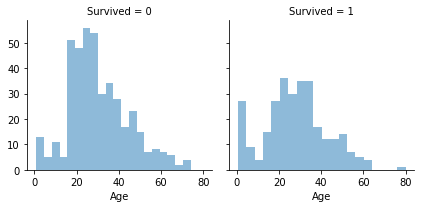

In [329]:
graph = sns.FacetGrid(train_data, col='Survived')
graph.map(plt.hist, 'Age', alpha=.5, bins=20)

#### Conclusions
* Infants (Age <= 4) had a high survival rate
* Oldest passengers (Age = 80) survived
* Large number of passengers aged 15 to 25 did not survive
* Most passengers are in the 15 to 35 range

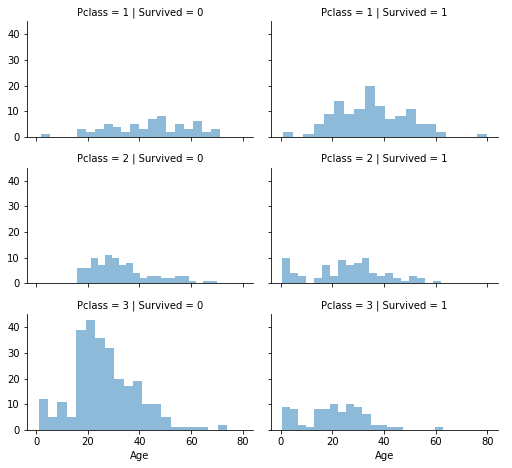

In [330]:
graph = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
graph.map(plt.hist, 'Age', alpha=.5, bins=20)
graph.add_legend()

#### Conclusions
* Pclass = 3 had most passengers, however, most did not survive
* Infant passengers in Pclass = 2 and Pclass = 3 mostly survived
* Most passengers in Pclass = 1 survived

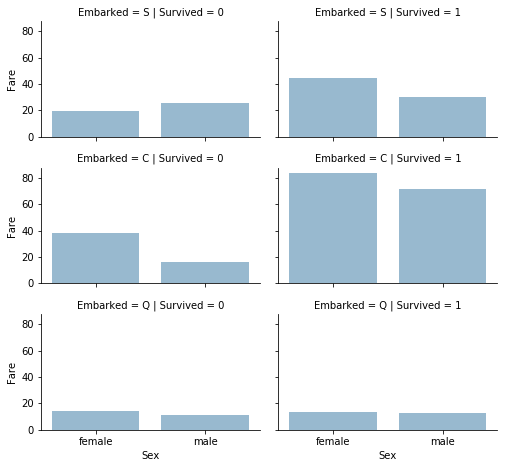

In [331]:
graph = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
graph.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
graph.add_legend()

#### Conclusions
* Port of embarkation correlates with survival rate
* Passengers that survived paid higher fares in most cases

### Correcting data

In [332]:
train_data = train_data.drop(columns=['Ticket', 'Cabin'])
test_data = test_data.drop(columns=['Ticket', 'Cabin'])

In [333]:
combine = [train_data, test_data]

for data in combine:
    data['Title'] = data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

    data['Title'] = pd.Categorical(data['Title'])
    data['Title'] = data['Title'].cat.codes

train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,2
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3


In [334]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=True).mean()

,Survived
Title,
0,0.575000
1,0.702703
2,0.156673
3,0.793651
4,0.347826


In [335]:
train_data = train_data.drop(columns=['Name'])
test_data = test_data.drop(columns=['Name'])

train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int) 
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int) 

In [336]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,2
2,1,1,1,38.0,1,0,71.2833,C,3
3,1,3,1,26.0,0,0,7.9250,S,1
4,1,1,1,35.0,1,0,53.1000,S,3
5,0,3,0,35.0,0,0,8.0500,S,2
6,0,3,0,NaN,0,0,8.4583,Q,2
7,0,1,0,54.0,0,0,51.8625,S,2
8,0,3,0,2.0,3,1,21.0750,S,0
9,1,3,1,27.0,0,2,11.1333,S,3


#### Completing the age feature
For the age feature we are going to generate random numbers between the mean and standard deviation, based on sets of Pclass and Gender combinations

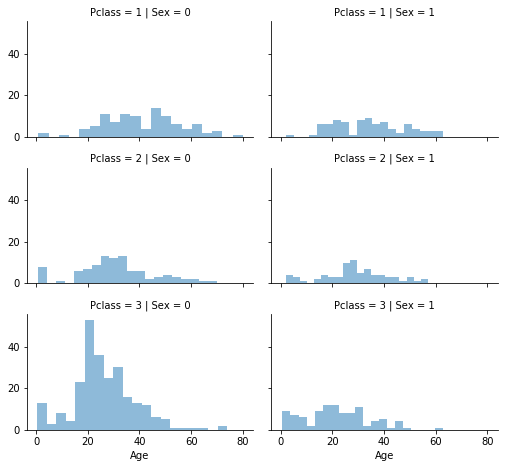

In [337]:
graph = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
graph.map(plt.hist, 'Age', alpha=.5, bins=20)
graph.add_legend()

In [338]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [339]:
combine = [train_data, test_data]

for data in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = data[(data['Sex'] == i) & (data['Pclass'] == j + 1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[(data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j + 1), 'Age'] = guess_ages[i, j]

    data['Age'] = data['Age'].astype(int)

train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22,1,0,7.2500,S,2
2,1,1,1,38,1,0,71.2833,C,3
3,1,3,1,26,0,0,7.9250,S,1
4,1,1,1,35,1,0,53.1000,S,3
5,0,3,0,35,0,0,8.0500,S,2
6,0,3,0,25,0,0,8.4583,Q,2
7,0,1,0,54,0,0,51.8625,S,2
8,0,3,0,2,3,1,21.0750,S,0
9,1,3,1,27,0,2,11.1333,S,3


Creating the AgeBand feature

In [340]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=True).mean().sort_values(by='AgeBand', ascending=True)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


Replace Age with ordinals based from AgeBand

In [341]:
combine = [train_data, test_data]

for data in combine:
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[data['Age'] >= 64, 'Age'] = 4

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
PassengerId,,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,2,"(16.0, 32.0]"
2,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
3,1,3,1,1,0,0,7.9250,S,1,"(16.0, 32.0]"
4,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
5,0,3,0,2,0,0,8.0500,S,2,"(32.0, 48.0]"


We can now remove the AgeBand feature

In [342]:
train_data = train_data.drop(['AgeBand'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,2
2,1,1,1,2,1,0,71.2833,C,3
3,1,3,1,1,0,0,7.9250,S,1
4,1,1,1,2,1,0,53.1000,S,3
5,0,3,0,2,0,0,8.0500,S,2


#### Create a new feature from existing features
We are going to create the FamilySize feature which combines Parch and SibSp

In [343]:
combine = [train_data, test_data]

for data in combine:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


We can create another feature IsAlone

In [344]:
combine = [train_data, test_data]

for data in combine:
    data['IsAlone'] = 1
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 0

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


We observe that the IsAlone is more closely related to Survival than FamilySize, Parch and SibSp so we are going to drop those

In [345]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
PassengerId,,,,,,,,
1,0,3,0,1,7.2500,S,2,1
2,1,1,1,2,71.2833,C,3,1
3,1,3,1,1,7.9250,S,1,0
4,1,1,1,2,53.1000,S,3,1
5,0,3,0,2,8.0500,S,2,0


We can also create an artificial feature that combines Age and Pclass

In [346]:
combine = [train_data, test_data]

for data in combine:
    data['Age*Class'] = data.Age * data.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
PassengerId,,,
1,3,1,3
2,2,2,1
3,3,1,3
4,2,2,1
5,6,2,3
6,3,1,3
7,3,3,1
8,0,0,3
9,3,1,3


#### Completing a categorical feature
Embarked feature takes S, Q, C values based on the port of embarkation.The training dataset has a couple of missing values.We are going to replace these with the most common occurence

In [347]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [348]:
combine = [train_data, test_data]

for data in combine:
    data['Embarked'] = data['Embarked'].fillna(freq_port)

train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Converting categorical feature to numeric

In [349]:
combine = [train_data, test_data]

for data in combine:
    data['Embarked'] = data['Embarked'].map({ 'S': 0, 'C': 1, 'Q': 2 }).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,,
1,0,3,0,1,7.2500,0,2,1,3
2,1,1,1,2,71.2833,1,3,1,2
3,1,3,1,1,7.9250,0,1,0,3
4,1,1,1,2,53.1000,0,3,1,2
5,0,3,0,2,8.0500,0,2,0,6


#### Quick complete and convert a numerical feature
We are now going to complete and convert the Fare feature

In [350]:
train_data['Fare'].fillna(train_data['Fare'].dropna().median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,,
1,0,3,0,1,7.2500,0,2,1,3
2,1,1,1,2,71.2833,1,3,1,2
3,1,3,1,1,7.9250,0,1,0,3
4,1,1,1,2,53.1000,0,3,1,2
5,0,3,0,2,8.0500,0,2,0,6


In [351]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=True).mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [352]:
combine = [train_data, test_data]

for data in combine:
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

    data['Fare'] = data['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,2,1,3
2,1,1,1,2,3,1,3,1,2
3,1,3,1,1,1,0,1,0,3
4,1,1,1,2,3,0,3,1,2
5,0,3,0,2,1,0,2,0,6


Our problem is a classification and regression problem. We want to identify a relationship between output (Survived or not) with the other variables or features. We are also performing supervised learning as we are training our model with a given a dataset. We these two criteria in mind, we will try the following:
* Decision Tree
* Random Forest
* Logistic Regression

In [353]:
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']
X_test = test_data.copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [354]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


86.64

In [355]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [359]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_logreg

79.57